<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/litneet64/Lab-6/litneet64_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Differential Equations**
**Pablo Aravena**

# **Abstract**

 In this report we are tasked with the implementation of methods  for differential equation approximations.

# **About the code**

In [0]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Pablo Aravena (pjan2@kth.se)

# Based on the template by Johan Hoffman (jhoffman@kth.se)
# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import numpy as np
from math import exp
import matplotlib.pyplot as plt

# **Introduction**

 In this lab, we are solving $IVP$ (initial value problems), which come in the form:
 
\begin{align*}
 \dot{u}(t)  &= f( u(t), t)  \text{             ,} 0 \lt t \lt T \\ 
  u(0) &= u_0
\end{align*}
 
 Where $u(t)$ is a scalar function $u: [0, T] \rightarrow R$ and it's what we are looking for, which can be quite difficult sometimes as no exact closed forms can be found, in those cases approximation methods need to be used.

# **Methods**

#### Explicit Euler
For these kind of problems, we can use the $\textit{Explicit Euler}$ method, which comes from the idea of approximating the function $u(t)$ at every $\textit{time step}$, with approximations in the form $U(t_i)$ being calculated at every time partition $0 = t_0, t_1, \dots, t_n = T$. Then, an approximation at any $t \in [0, T]$ can be constructed from the very beginning ($t_0$) up to a $t_n$ in sequence.

For an approximation $U_n = U(t_n)$:

\begin{equation*}
    U_n = U_{n - 1} + K_n \cdot f(U_{n-1}, t_{n-1})
\end{equation*}

Where $K_n = t_n - t_{n-1}$.

Luckily for us, this algorithm works for both linear systems as the scalar version.
Now, the $\textit{Explicit Euler}$ method shown below has some minor modifications regarding the storage of every state at a time step, where we store the states at the columns of $U$ and reuse them for the next calculation instead of only storing the last $2$ ones as seen on the algorithm $13.1$ from the lecture notes.

In [0]:
def explicit_euler(func, T, u_0, k):
    # set initial time 
    t = 0
    
    # calculate number of subintervals
    N = int(T / k)
    
    # empty vector/matrix for the approximation u with a column for every state on a diff time node
    u = np.zeros((u_0.shape[0], N))
    
    # fill first column with initial value
    u[:, 0] = u_0
    
    for i in range(1, N):
        # compute new state and store it in the column i of u
        u[:, i] = u[:, i-1] + k * func(u[:, i-1], t)
        # new time interval
        t = t + k
    
    return u

#### Test Methods

To verify the stability and accuracy of the scalar case, we plotted the real solution function along with our approximation. For this, we chose an easy differential equation $\dot{u}(t) = -u(t)$, with border condition $u(0) = u_0 = -10$, thus having the solution function $u(t) = -10\cdot e^{-t}$. We also used $T = 30$ and time step length $k_n = 1$.

In [0]:
# just sets common setting for our plots
def setPlotVals(title, x_label, y_label):
    # setup size of figure (width, height)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 20
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
        
    # setup labels for graph and show it
    plt.title(title, fontsize = 50)
    plt.ylabel(y_label, fontsize = 35)
    plt.xlabel(x_label, fontsize = 35)
                        
    plt.show()

# test the accuracy for the scalar case
def testScalar(k):
    # initial condition, T and time step length
    u_0 = -10
    T = 30
    k_n = k
    
    # time steps for plotting
    time_steps = np.arange(0, T, k_n)
    
    # test function and it's derivative
    f = lambda t: u_0 * exp(-t)
    df_t = lambda U, t: -U
    
    # get initial condition as a vector
    u_0 = np.array([u_0])
    
    # get approximations and real values
    our_approx = explicit_euler(df_t, T, u_0, k_n)
    real_vals = list(map(f,  time_steps))
    
    # plot for real function
    plt.plot(time_steps, real_vals, ",--r", linewidth = 2)
    
    # plot for our approximation function
    plt.plot(time_steps, our_approx[0], ",--b", linewidth = 2)
    
    
    plt.legend(["-10 * e^(-t)", "approx. function"], fontsize = 20)
    
    # plot both
    setPlotVals(f'Both functions plotted together (k = {k_n})', 'X axis', 'Y axis')
    


To verify the stability of the linear system case we need to check if all the eigenvalues are negative, that is $\lambda_i < 0$, $\forall i$.

For this we used the system:

\begin{equation*}
    \dot{u} = \begin{bmatrix}
                   -3 & 0\\
                   0 & -4
              \end{bmatrix}
              \begin{bmatrix}
                   u_1(t)\\
                   u_2(t)
              \end{bmatrix}
\end{equation*}

With $T = 10$ and:

\begin{equation*}
        u_0 = \begin{bmatrix}
                   1\\
                   1
              \end{bmatrix}
\end{equation*}
         
Then the matrix $A$ possess the eigenvalues $\lambda_1 = -4$ and $\lambda_2 = -3$

In [0]:
def testSystem(k):
    # initial value (should be a vector but it has the same values so we re-use this instead)
    u_0 = 1
    T = 10
    k_n = k
    
    
    # associated matrix A
    A = np.array([[-3, 0], [0, -4]])
    
    # test function and it's derivative
    f = lambda t: ([u_0 * exp(A[0,0] * t),  u_0 * exp(A[1,1] * t)])
    df = lambda u, t: A @ u
    
    # time steps
    time_steps = np.arange(0, T, k_n)
    
    # our approximations and real values
    our_approx = explicit_euler(df, T, np.array([u_0, u_0]), k_n)
    our_approx = list(zip(our_approx[0], our_approx[1]))
    real_vals = list(map(f, time_steps))
    
    # plot for real function
    plt.plot(time_steps, real_vals, ",--r", linewidth = 2, label = "real function" )
    
    # plot for our approximation function
    plt.plot(time_steps, our_approx, ",--b", linewidth = 2, label = "approx. function")
    
    
    plt.legend(fontsize = 20)
    
    # plot both
    setPlotVals(f'Both functions plotted together (k = {k_n})', 'X axis', 'Y axis')
    
    

# **Results**

#### Scalar Case

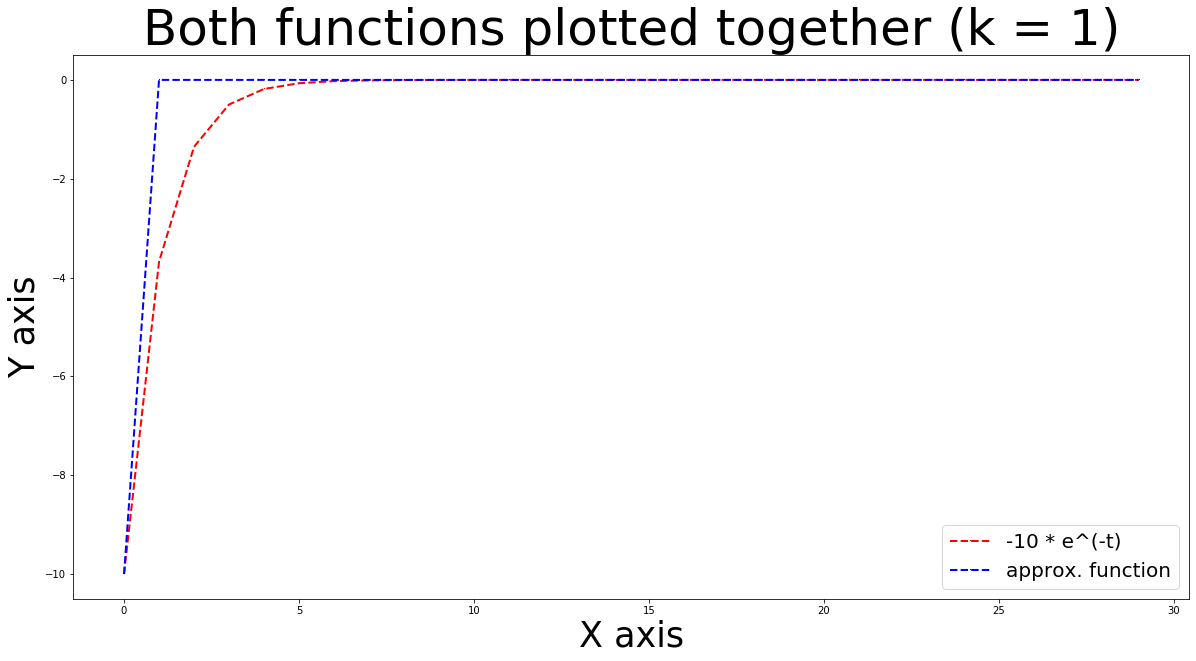

In [0]:
testScalar(1)

To test the stability on the scalar case we need to remember that the stability of the approximation function is given by the condition $|1 + \lambda \cdot k_n| \lt 1$ for the $\textit{Explicit Euler}$ algorithm, where $\dot{u}(t) = \lambda \cdot u(t)$. On the previous plot we used an $\lambda = 1$ and $k_n = 1$, but now we will show how it changes with other $k_n$s: $0.001$, $0.01$, $0.1$, $2$, $3$ and $5$, with the last ones causing instability.

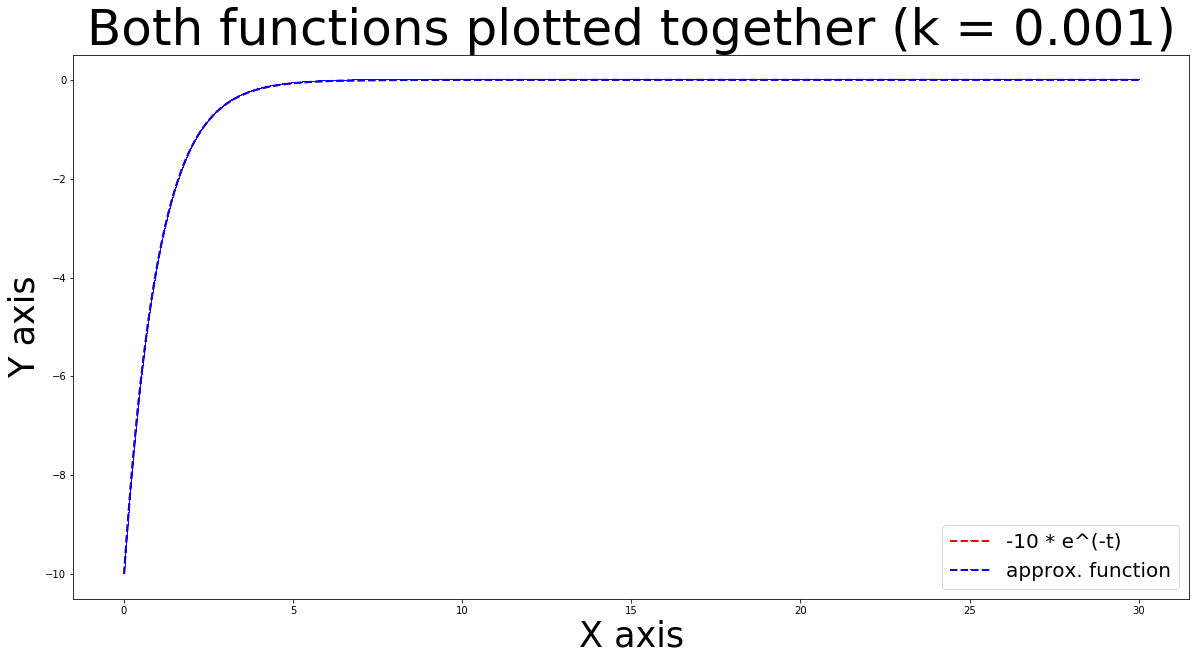

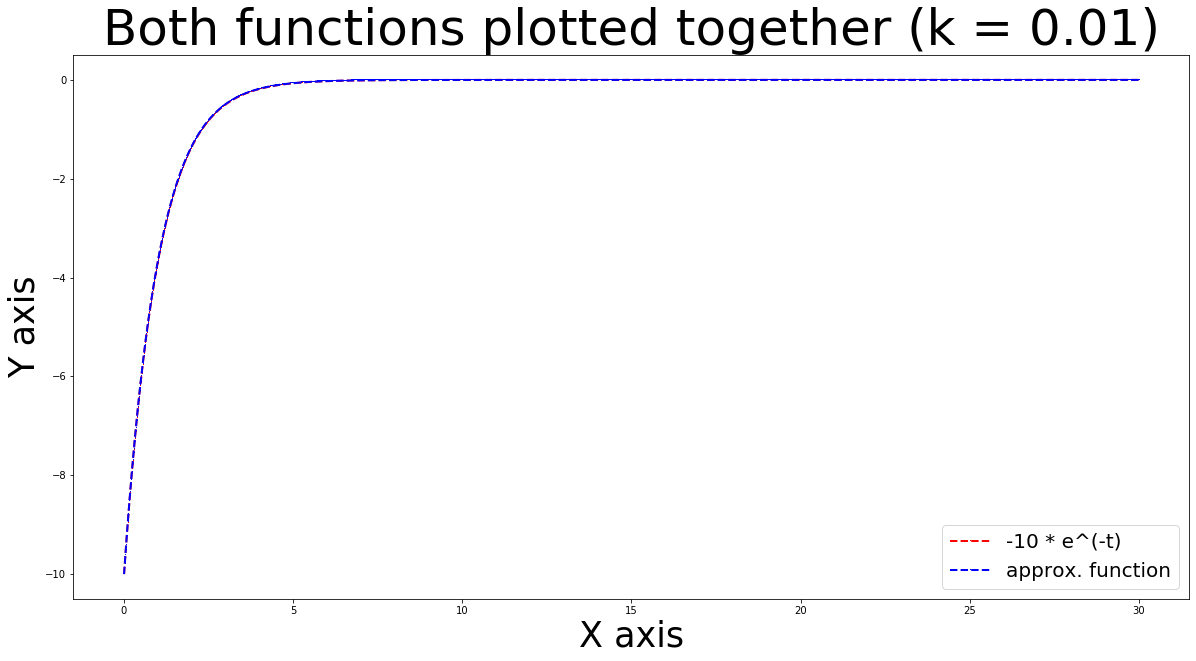

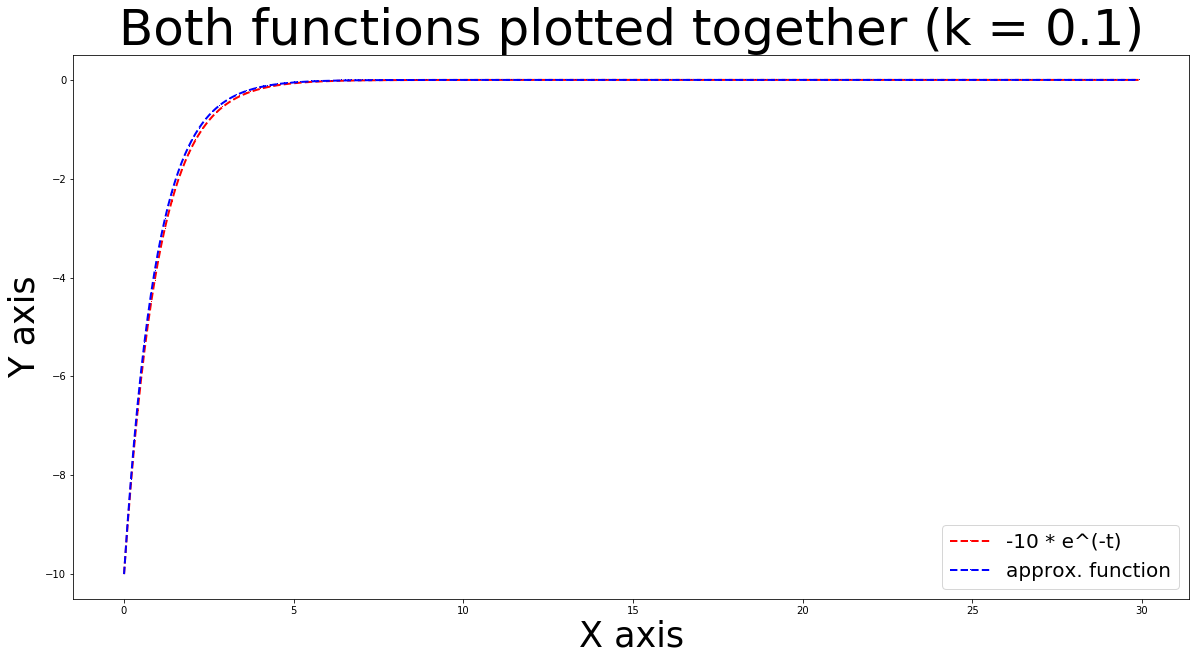

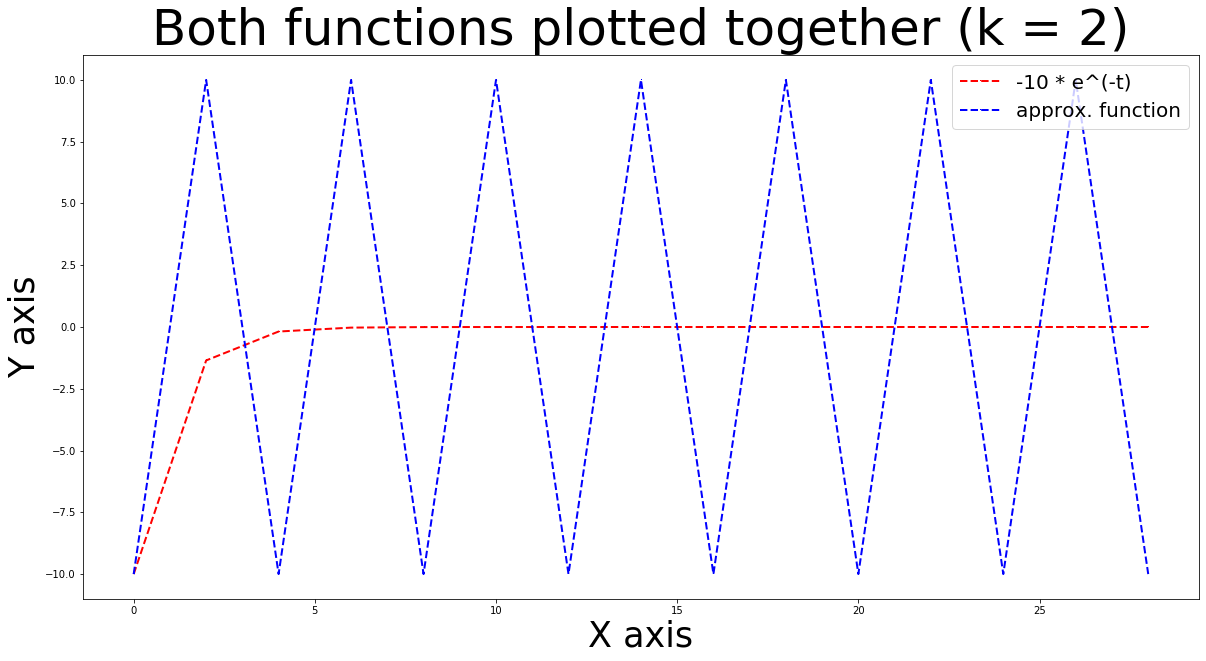

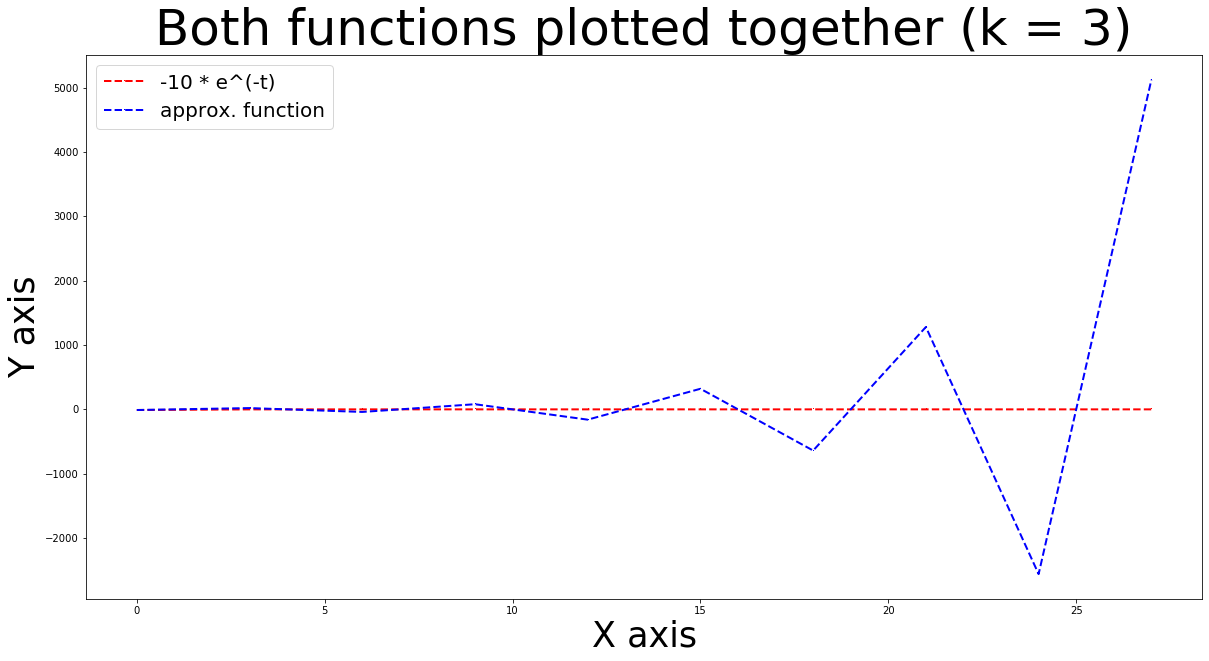

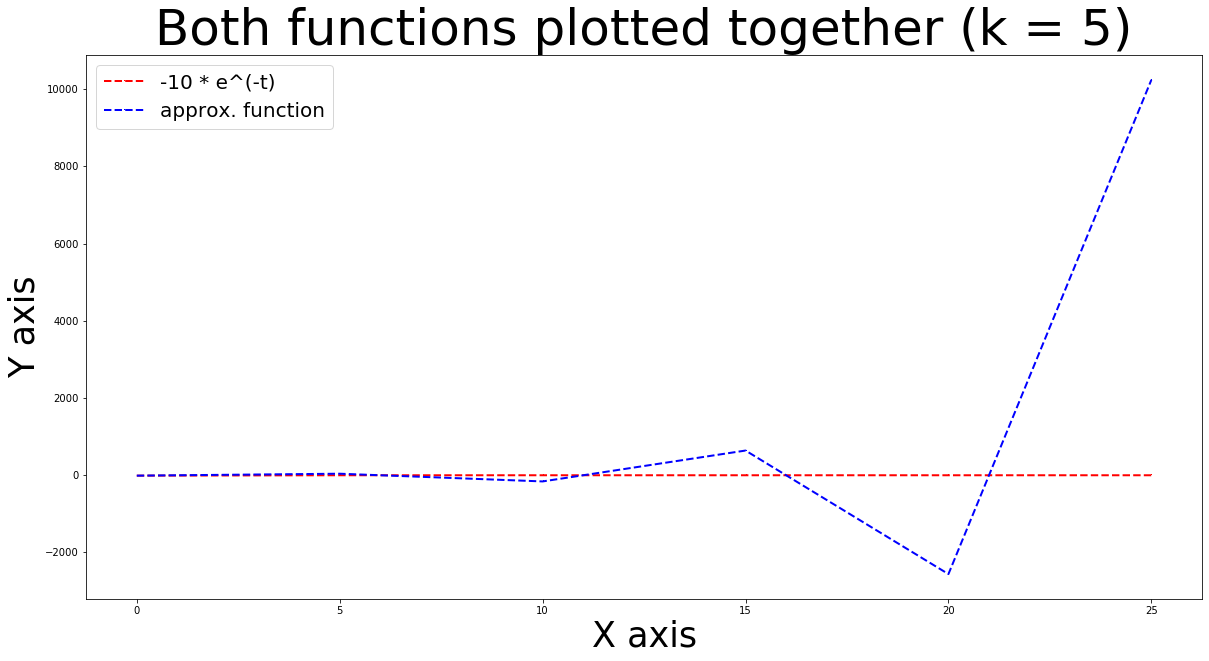

In [0]:
for i in [0.001, 0.01, 0.1, 2, 3, 5]:
    testScalar(i)

#### System Case

Here we will show how the $\textit{Explicit Euler}$ method behaves when we increase the time steps ($k$).

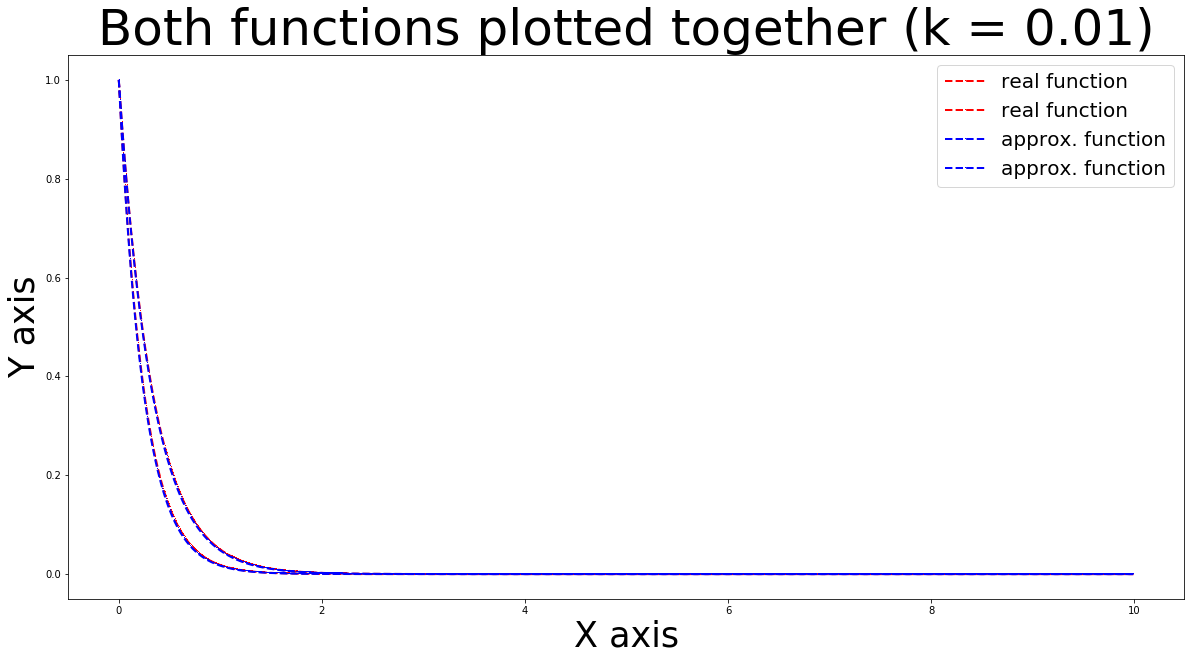

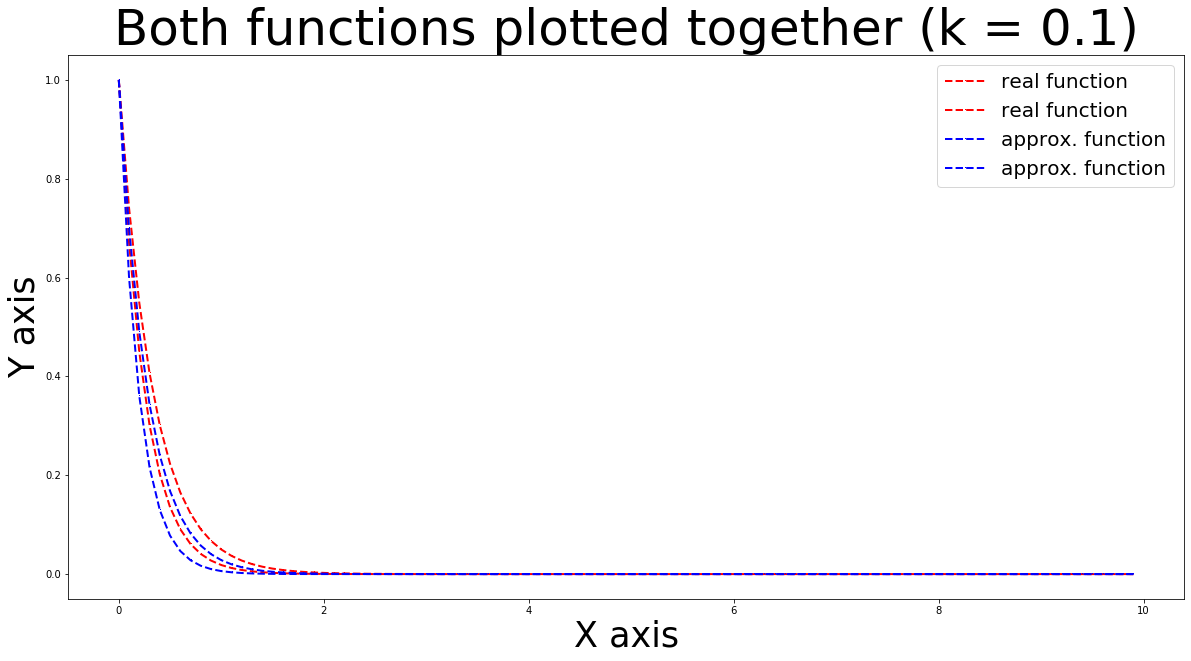

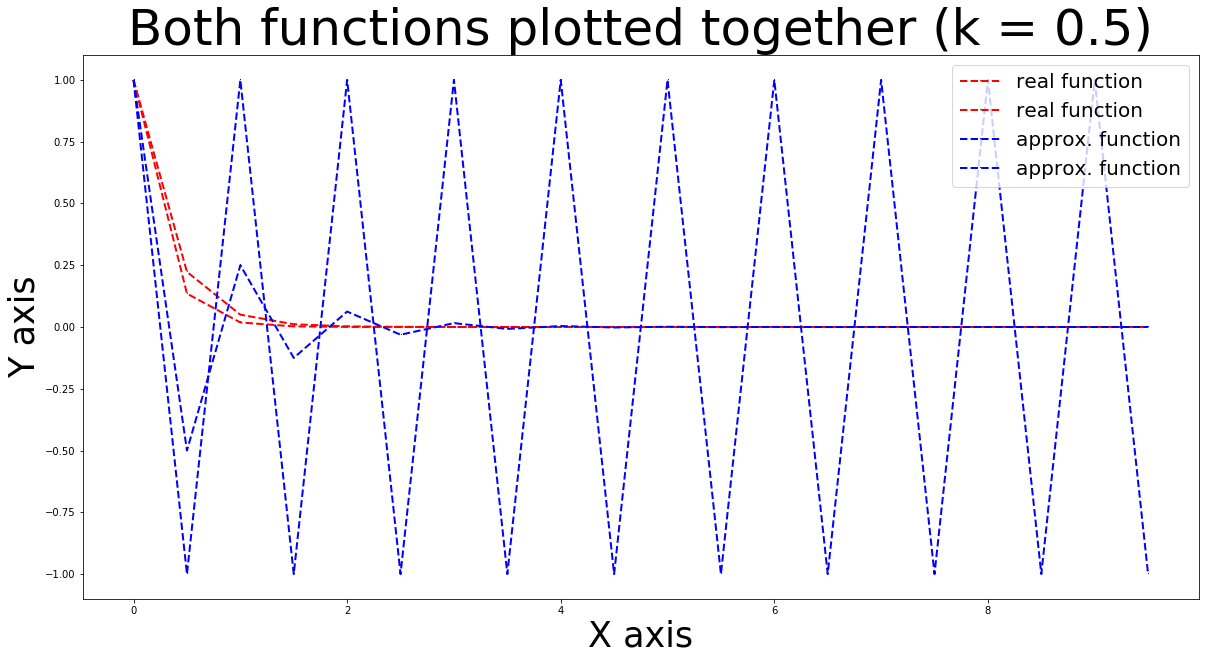

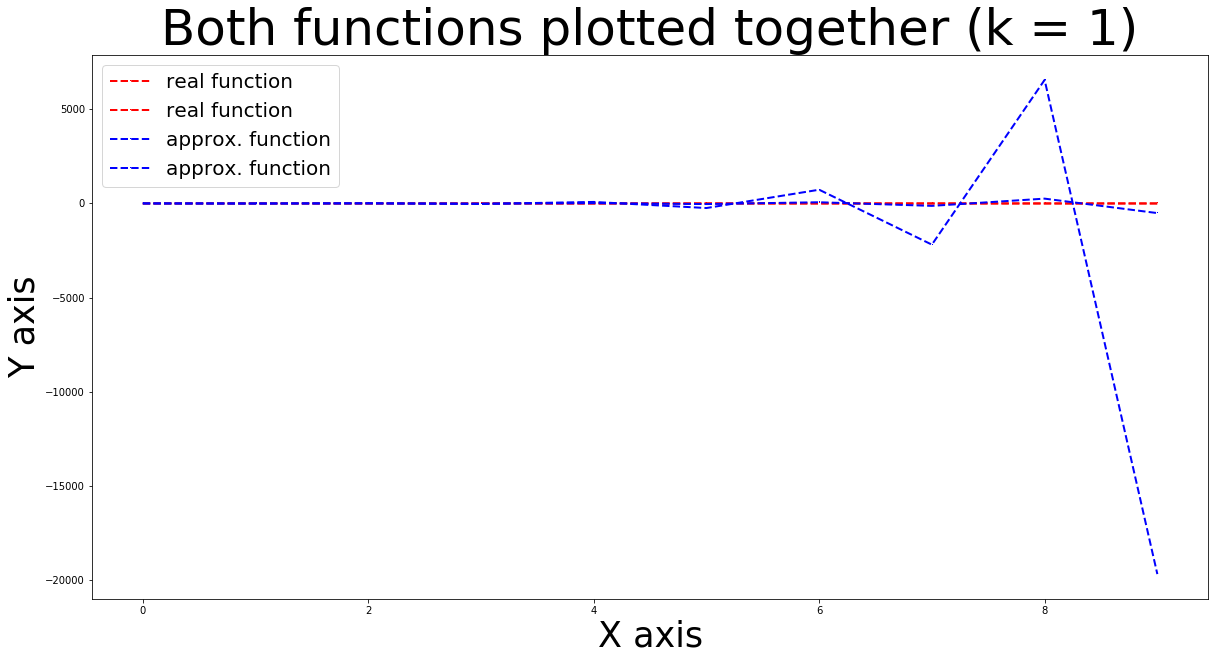

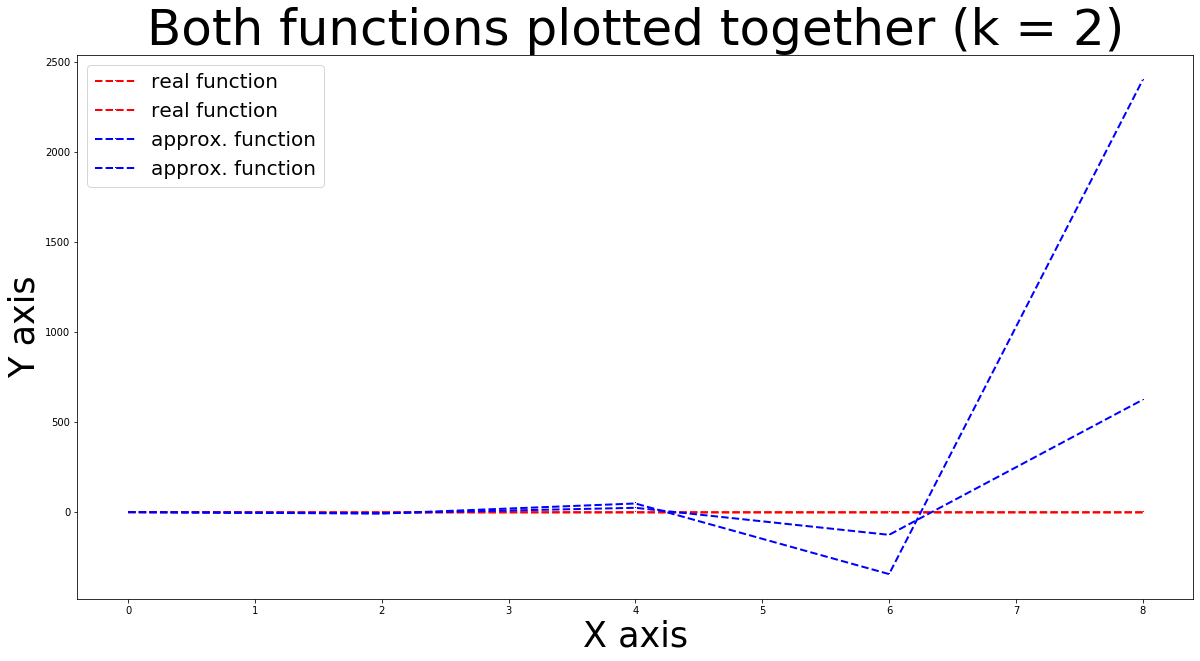

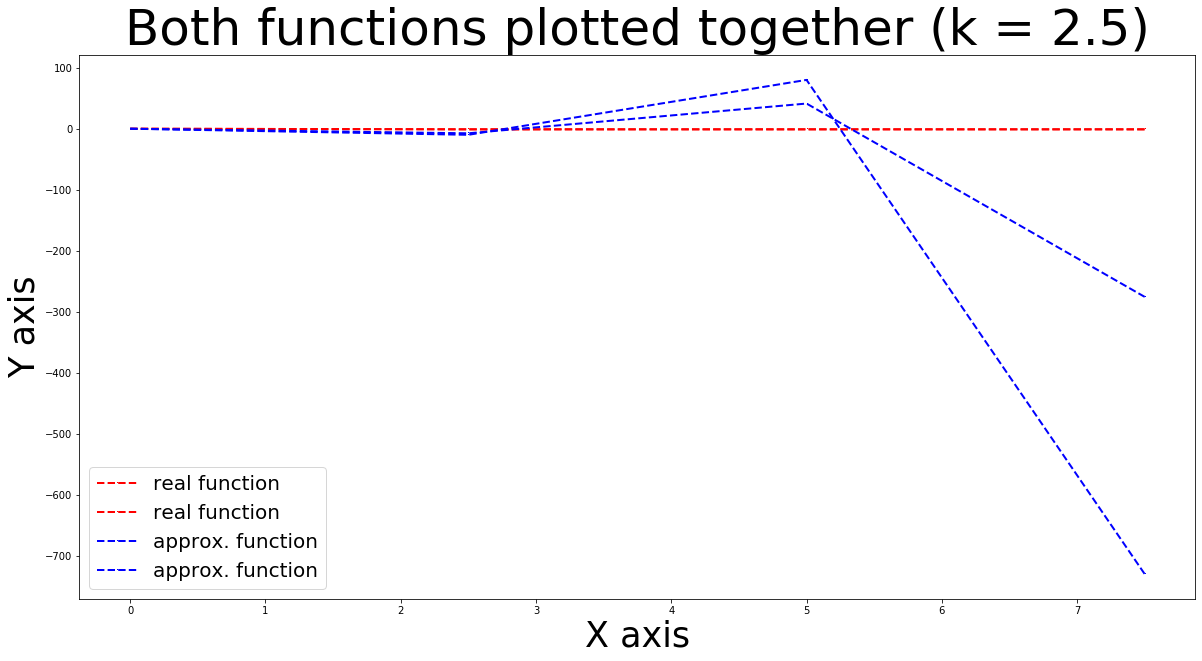

In [6]:
for k in [0.01, 0.1, 0.5, 1, 2, 2.5]:
    testSystem(k)

# **Discussion**

 As stated in the introduction, most of the times a closed form for the solution of a differential equation is not achievable easily, so knowing how to make a good approximation for the solution and the details about the stability of the algorithms is crucial for dynamic system simulations. This lab was quite entertaining for the same reason.